In [1]:
%matplotlib inline
import matplotlib.image as mpimg
import scipy.ndimage as ndimage
import matplotlib.pyplot as plt
import numpy as np
import random

# 2D perlin Noise Generator
---

## implementation of Perlin Noise

a simple demonstration how perlin heightmaps can be generated in python

In [2]:
n = 6
raw_noise = np.zeros(shape=(n+1, n+1,2))

# initialize random seed
np.random.seed(42)

# fill raw noise with random unit vectors
for i in range(n+1):
    for j in range(n+1):
        # TODO: very inefficient loop!
        x = np.random.normal()
        y = np.random.normal()
        
        # normalize:
        mag = (x**2+y**2)**.5
        x /= mag
        y /= mag
        
        raw_noise[i,j,0] = x
        raw_noise[i,j,1] = y 


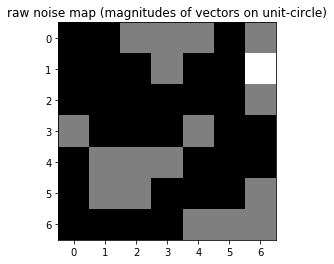

In [3]:
fig1, ax1 = plt.subplots()

ax1.imshow(np.linalg.norm(raw_noise, axis=2), cmap='binary')
#print(img_binary)
ax1.set_title("raw noise map (magnitudes of vectors on unit-circle)")
plt.show()

In [4]:
def lerp(a0, a1, w):
    return a0 + w*(a1 - a0)

def dotGridGradient(ix, iy, x,y):
    dx = x - ix
    dy = y - iy
    
    return dx * raw_noise[ix, iy,0] + dy * raw_noise[ix,iy,1]

In [5]:
def perlin(x,y):
    x0 = int(x)
    y0 = int(y)
    
    x1 = x0 + 1
    y1 = y0 + 1
    
    sx = x - x0
    sy = y - y0
    
    n0 = dotGridGradient(x0,y0,x,y)
    n1 = dotGridGradient(x1,y0,x,y)
    ix0 = lerp(n0,n1,sx)
    
    n0 = dotGridGradient(x0,y1,x,y)
    n1 = dotGridGradient(x1,y1,x,y)
    ix1 = lerp(n0,n1,sx)
    
    return lerp(ix0,ix1,sy)

In [6]:
perlin_factor = 32
n_perlin = perlin_factor*n
perlin_noise = np.zeros(shape=(n_perlin, n_perlin))

for x in range(n_perlin):
    for y in range(n_perlin):
        perlin_noise[x,y] = perlin(x/perlin_factor,y/perlin_factor)

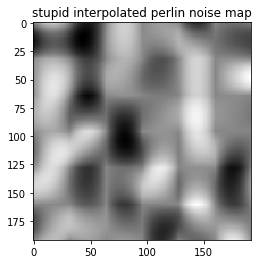

In [7]:
fig2, ax2 = plt.subplots()

ax2.imshow(perlin_noise, cmap='binary')
#print(img_binary)
ax2.set_title("stupid interpolated perlin noise map")
plt.show()